In [26]:
import json 
import pandas as pd
import re

In [207]:
#Read the json files
general = pd.read_json("data_clar/general_log.json")
slow = pd.read_json("data_clar/slow_log.json")

In [28]:
######### SLOW LOG DATASET ANALYSIS #######

In [29]:
#slow.head()
pd.set_option('display.max_colwidth', None)
slow["sql_text"] = slow["sql_text"].str.replace('ApplicationName=DataGrip 2020.2.3','')
slow["sql_text"] = slow["sql_text"].str.replace('-- using .[0-9]+ as a seed to the RNG','')
slow["sql_text"] = slow["sql_text"].str.replace('^\/\* ','')
slow["sql_text"] = slow["sql_text"].str.replace('^.\*/','')
slow["sql_text"] = slow["sql_text"].str.replace('\n\n\n','')
slow["sql_text"] = slow["sql_text"].str.replace('\n',' ')
slow["sql_text"] = slow["sql_text"].str.replace('\t','')
slow["sql_text"] = slow["sql_text"].str.replace(',','')
slow.sort_values("query_time", ascending = False)

,start_time,user_host,query_time,lock_time,rows_sent,rows_examined,db,last_insert_id,insert_id,server_id,sql_text,thread_id
515,2021-01-14 15:00:23.700871,guest[guest] @ [185.9.209.177],2021-03-21 00:00:11.073425,2021-03-21 00:00:00.000098,77212,154424,tpch,0,0,97408076,select * from mysql.slow_log order by start_time desc,63
3530,2021-01-14 14:05:07.986773,guest[guest] @ [172.31.36.183],2021-03-21 00:00:09.719274,2021-03-21 00:00:00.000178,4,4423667,tpch,0,0,97408076,select l_returnflag l_linestatus sum(l_quantity) as sum_qty sum(l_extendedprice) as sum_base_price sum(l_extendedprice * (1 - l_discount)) as sum_disc_price sum(l_extendedprice * (1 - l_discount) * (1 + l_tax)) as sum_charge avg(l_quantity) as avg_qty avg(l_extendedprice) as avg_price avg(l_discount) as avg_disc count(*) as count_order from lineitem where l_shipdate <= date '1998-12-01' - interval '67' day group by l_returnflag l_linestatus order by l_returnflag l_linestatus,40
2205,2021-01-14 14:22:23.302952,guest[guest] @ [172.31.36.183],2021-03-21 00:00:09.682569,2021-03-21 00:00:00.000150,4,4423667,tpch,0,0,97408076,select l_returnflag l_linestatus sum(l_quantity) as sum_qty sum(l_extendedprice) as sum_base_price sum(l_extendedprice * (1 - l_discount)) as sum_disc_price sum(l_extendedprice * (1 - l_discount) * (1 + l_tax)) as sum_charge avg(l_quantity) as avg_qty avg(l_extendedprice) as avg_price avg(l_discount) as avg_disc count(*) as count_order from lineitem where l_shipdate <= date '1998-12-01' - interval '82' day group by l_returnflag l_linestatus order by l_returnflag l_linestatus,40
7622,2021-01-14 13:12:20.523862,guest[guest] @ [172.31.36.183],2021-03-21 00:00:09.659742,2021-03-21 00:00:00.000152,4,4423667,tpch,0,0,97408076,select l_returnflag l_linestatus sum(l_quantity) as sum_qty sum(l_extendedprice) as sum_base_price sum(l_extendedprice * (1 - l_discount)) as sum_disc_price sum(l_extendedprice * (1 - l_discount) * (1 + l_tax)) as sum_charge avg(l_quantity) as avg_qty avg(l_extendedprice) as avg_price avg(l_discount) as avg_disc count(*) as count_order from lineitem where l_shipdate <= date '1998-12-01' - interval '96' day group by l_returnflag l_linestatus order by l_returnflag l_linestatus,40
3140,2021-01-14 14:10:02.125691,guest[guest] @ [172.31.36.183],2021-03-21 00:00:09.625275,2021-03-21 00:00:00.000157,4,4423667,tpch,0,0,97408076,select l_returnflag l_linestatus sum(l_quantity) as sum_qty sum(l_extendedprice) as sum_base_price sum(l_extendedprice * (1 - l_discount)) as sum_disc_price sum(l_extendedprice * (1 - l_discount) * (1 + l_tax)) as sum_charge avg(l_quantity) as avg_qty avg(l_extendedprice) as avg_price avg(l_discount) as avg_disc count(*) as count_order from lineitem where l_shipdate <= date '1998-12-01' - interval '86' day group by l_returnflag l_linestatus order by l_returnflag l_linestatus,40
...,...,...,...,...,...,...,...,...,...,...,...,...
788,2021-01-14 14:54:44.399252,rdsadmin[rdsadmin] @ localhost [],2021-03-21 00:00:00.000008,2021-03-21 00:00:00.000000,0,0,,0,0,97408076,Quit,62
996,2021-01-14 14:49:29.398905,rdsadmin[rdsadmin] @ localhost [],2021-03-21 00:00:00.000008,2021-03-21 00:00:00.000000,0,0,,0,0,97408076,Quit,61
3737,2021-01-14 14:02:14.408939,rdsadmin[rdsadmin] @ localhost [],2021-03-21 00:00:00.000008,2021-03-21 00:00:00.000000,0,0,,0,0,97408076,Quit,52
4531,2021-01-14 13:51:44.412923,rdsadmin[rdsadmin] @ localhost [],2021-03-21 00:00:00.000008,2021-03-21 00:00:00.000000,0,0,,0,0,97408076,Quit,50


In [30]:
#the most common queries
query = slow["sql_text"]
query_df = query.value_counts().reset_index()
query_df.columns = ['queries','count']
query_df.head(10)

,queries,count
0,SELECT 1,5413
1,SELECT count(*) from information_schema.TABLES WHERE TABLE_SCHEMA = 'mysql' AND TABLE_NAME = 'rds_heartbeat2',968
2,SELECT @@GLOBAL.read_only,924
3,SELECT value FROM mysql.rds_heartbeat2,924
4,SELECT count(*) from mysql.rds_history WHERE action = 'disable set master' GROUP BY action_timestampcalled_by_useractionmysql_versionmaster_hostmaster_portmaster_usermaster_log_file master_log_posmaster_ssl ORDER BY action_timestamp LIMIT 1,231
5,SELECT count(*) from mysql.rds_replication_status WHERE master_host IS NOT NULL and master_port IS NOT NULL GROUP BY action_timestampcalled_by_useractionmysql_versionmaster_hostmaster_port ORDER BY action_timestamp LIMIT 1,231
6,SELECT @@session.transaction_read_only,191
7,Quit,47
8,flush logs,46
9,SELECT NAME VALUE FROM mysql.rds_configuration,46


In [31]:
#new_df = slow_split.stack().value_counts().reset_index()
#new_df.columns = ['words','count']

In [32]:
#how many tables?
slow_low = slow["sql_text"].str.casefold()
slow_tables = slow_low[slow_low.str.contains("from")]

#extract the tables name 
tables_name = slow_tables.str.extract(r'(from.[a-z.]*)')
tables_name_clean = tables_name[0].str.replace('from','')

#tables_name
#tables_name_clean.head()
tables_name_freq = tables_name_clean.value_counts().reset_index()
tables_name_freq = tables_name_freq.drop(3, axis = 0)
tables_name_freq = tables_name_freq.rename(columns = {"index": "tables", 0: "count" })
tables_name_more_freq = tables_name_freq.head()

<AxesSubplot:title={'center':'the most common tables'}, ylabel='tables'>

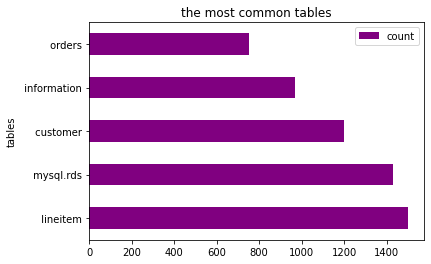

In [33]:
#the most common tables
tables_name_more_freq.plot.barh(x='tables', title = "the most common tables",
                      y='count',
                      color="purple")

In [39]:
slow_split = slow_low.str.split(expand=True)
#slow_split

In [40]:
new_df = slow_split.stack().value_counts().reset_index()
new_df.columns = ['words','count']
new_df.head(30)

,words,count
0,and,36753
1,=,28165
2,select,19459
3,from,14708
4,where,10291
5,as,8757
6,1,8079
7,by,7080
8,date,6300
9,(,5400


<AxesSubplot:title={'center':'frequent operations'}, ylabel='words'>

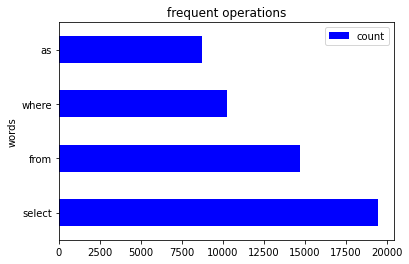

In [328]:
#frequent operations
frequent_op = new_df.iloc[2:6,]
frequent_op.plot.barh(x='words', title = "frequent operations",
                      y='count',
                      color="blue")

<AxesSubplot:title={'center':'frequent fileds'}, ylabel='words'>

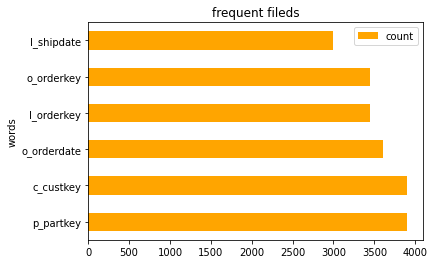

In [329]:
#frequent fileds in queries
frequent_fileds = new_df.iloc[[15,16,20,21,23,26],]
frequent_fileds.plot.barh(x='words', title = "frequent fileds",
                      y='count',
                      color="orange")

In [43]:
###### MACHINE LEARNING ALGORITHM TO PREDICT QUERY TIME #####

In [104]:
#all sql text in lower case
sql_text = slow["sql_text"].str.casefold()

In [189]:
#extract seconds from the query time
from datetime import datetime as dt
import time
slow_time = slow["query_time"].dt.second
slow_time.sort_values(ascending = False)

515     11
3140     9
5802     9
8228     9
2812     9
        ..
9550     0
9549     0
9548     0
9547     0
0        0
Name: query_time, Length: 15688, dtype: int64

In [70]:
#buildn the dataframe for the prediction
df_pred =pd.DataFrame({'sql_text': sql_text, 'query_time': slow_time})
df_pred.sort_values("query_time", ascending = False)


,sql_text,query_time
515,select * from mysql.slow_log order by start_time desc,00:00:11.073425
3530,select l_returnflag l_linestatus sum(l_quantity) as sum_qty sum(l_extendedprice) as sum_base_price sum(l_extendedprice * (1 - l_discount)) as sum_disc_price sum(l_extendedprice * (1 - l_discount) * (1 + l_tax)) as sum_charge avg(l_quantity) as avg_qty avg(l_extendedprice) as avg_price avg(l_discount) as avg_disc count(*) as count_order from lineitem where l_shipdate <= date '1998-12-01' - interval '67' day group by l_returnflag l_linestatus order by l_returnflag l_linestatus,00:00:09.719274
2205,select l_returnflag l_linestatus sum(l_quantity) as sum_qty sum(l_extendedprice) as sum_base_price sum(l_extendedprice * (1 - l_discount)) as sum_disc_price sum(l_extendedprice * (1 - l_discount) * (1 + l_tax)) as sum_charge avg(l_quantity) as avg_qty avg(l_extendedprice) as avg_price avg(l_discount) as avg_disc count(*) as count_order from lineitem where l_shipdate <= date '1998-12-01' - interval '82' day group by l_returnflag l_linestatus order by l_returnflag l_linestatus,00:00:09.682569
7622,select l_returnflag l_linestatus sum(l_quantity) as sum_qty sum(l_extendedprice) as sum_base_price sum(l_extendedprice * (1 - l_discount)) as sum_disc_price sum(l_extendedprice * (1 - l_discount) * (1 + l_tax)) as sum_charge avg(l_quantity) as avg_qty avg(l_extendedprice) as avg_price avg(l_discount) as avg_disc count(*) as count_order from lineitem where l_shipdate <= date '1998-12-01' - interval '96' day group by l_returnflag l_linestatus order by l_returnflag l_linestatus,00:00:09.659742
3140,select l_returnflag l_linestatus sum(l_quantity) as sum_qty sum(l_extendedprice) as sum_base_price sum(l_extendedprice * (1 - l_discount)) as sum_disc_price sum(l_extendedprice * (1 - l_discount) * (1 + l_tax)) as sum_charge avg(l_quantity) as avg_qty avg(l_extendedprice) as avg_price avg(l_discount) as avg_disc count(*) as count_order from lineitem where l_shipdate <= date '1998-12-01' - interval '86' day group by l_returnflag l_linestatus order by l_returnflag l_linestatus,00:00:09.625275
...,...,...
788,quit,00:00:00.000008
996,quit,00:00:00.000008
3737,quit,00:00:00.000008
4531,quit,00:00:00.000008


In [71]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [257]:
#use the vector representation BoW
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,1))
X = vectorizer.fit_transform(df_pred["sql_text"])

In [315]:
tf_idf_vec_smooth = TfidfVectorizer(use_idf=True,  
                        smooth_idf=True,  
                        ngram_range=(1,1))
tf_idf_data_smooth = tf_idf_vec_smooth.fit_transform(slow["sql_text"])
 
print("With Smoothing:")
tf_idf_dataframe_smooth=pd.DataFrame(tf_idf_data_smooth.toarray(),columns=tf_idf_vec_smooth.get_feature_names())

tf_smooth = tf_idf_dataframe_smooth.drop(tf_idf_dataframe_smooth.columns[0:328], axis = 1)
tf_smooth

With Smoothing:


,_version,accounts,action,action_timestamp,africa,air,algeria,all_nations,almond,america,amount,and,anodized,antique,applicationname,aquamarine,arabia,argentina,as,asia,aurora,auto_increment_increment,autocommit,automobile,avg,avg_disc,avg_price,avg_qty,avg_yearly,azure,bag,before,beige,between,binary,bisque,black,blanched,blue,blush,box,brand,brass,brazil,brown,brushed,building,burlywood,burnished,by,c_acctbal,c_address,c_comment,c_count,c_custkey,c_mktsegment,c_name,c_nationkey,c_orders,c_phone,called_by_user,can,canada,case,character_set_client,character_set_connection,character_set_results,character_set_server,chartreuse,chiffon,china,chocolate,cntrycode,collate,collation_connection,collation_server,commit,complaints,connector,copper,coral,cornflower,cornsilk,count,count_order,cream,cust_nation,custdist,customer,custsale,cyan,dark,database,datagrip,date,day,deep,default,definer,deliver,deposits,desc,dim,disable,disable_rewriter,distinct,dodger,drab,drum,duplicate,east,economy,egypt,else,enable_rewriter,end,ethiopia,europe,exists,express,extract,firebrick,floral,flush,flush_rewrite_rules,fob,for,forest,france,from,frosted,function,furniture,gainsboro,general,germany,ghost,global,goldenrod,green,grey,group,having,high,high_line_count,honeydew,hot,household,id,in,india,indian,indonesia,information_schema,init_connect,innodb_sys_tables,insert,interactive_timeout,interval,into,iran,iraq,is,ivory,japan,jar,java,join,jordan,jumbo,kenya,key,khaki,kingdom,l1,l2,l3,l_commitdate,l_discount,l_extendedprice,l_linestatus,l_orderkey,l_partkey,l_quantity,l_receiptdate,l_returnflag,l_shipdate,l_shipinstruct,l_shipmode,l_suppkey,l_tax,l_year,lace,lambda_async,large,lavender,lawn,left,lemon,lg,license,light,like,lime,limit,lineitem,linen,localhost,logs,low_line_count,lower_case_table_names,machinery,magenta,mail,maroon,master,master_host,master_log_file,master_log_pos,master_port,master_ssl,master_user,max_allowed_packet,med,medium,metallic,middle,midnight,min,mint,misty,mkt_share,moccasin,month,morocco,mozambique,mysql,mysql_cipher_stats_flush_period_in_seconds,mysql_version,n1,n2,n_name,n_nationkey,n_regionkey,name,names,nation,navajo,navy,net_write_timeout,nickel,no_engine_substitution,not,null,numcust,numwait,o_comment,o_custkey,o_orderdate,o_orderkey,o_orderpriority,o_orderstatus,o_shippriority,o_totalprice,o_year,olive,on,or,orange,orchid,order,order_count,orders,outer,p_brand,p_container,p_mfgr,p_name,p_partkey,p_size,p_type,pack,packages,pale,papaya,part,partsupp,peach,pending,performance_schema,person,peru,ping,pink,pkg,plated,plum,polished,powder,procedure,profit,promo,promo_revenue,ps_availqty,ps_partkey,ps_suppkey,ps_supplycost,puff,purge,purple,quit,r_name,r_regionkey,rail,rds_clean_replication_status,rds_collect_global_status_history,rds_configuration,rds_disable_binlog_for_session,rds_disable_gsh_collector,rds_disable_gsh_rotation,rds_enable_binlog_for_session,rds_enable_gsh_collector,rds_enable_gsh_rotation,rds_external_master,rds_flush_tables_with_read_lock,rds_heartbeat2,rds_history,rds_import_binlog_ssl_material,rds_innodb_buffer_pool_dump_now,rds_innodb_buffer_pool_load_abort,rds_innodb_buffer_pool_load_now,rds_kill,rds_kill_query,rds_kill_query_id,rds_next_master_log,rds_remove_binlog_ssl_material,rds_replication_status,rds_reset_external_master,rds_rotate_general_log,rds_rotate_global_status_history,rds_rotate_slow_log,rds_set_configuration,rds_set_external_master,rds_set_external_master_gtid,rds_set_external_master_with_auto_position,rds_set_external_master_with_delay,rds_set_fk_checks_off,rds_set_fk_checks_on,rds_set_gsh_collector,rds_set_gsh_rotation,rds_set_master_auto_position,rds_set_read_only,rds_set_source_delay,rds_set_sql_log_bin,rds_show_configuration,rds_skip_repl_error,rds_skip_transaction_with_gtid,rds_start_replication,rds_start_replication_until,rds_start_replication_until_gtid,rds_stop_replication,rdsadmin,read,read_only,red,reg,region,requests,revenue,revision,rng,romania,rose,rosy,royal,russia,s_acctb

In [77]:
#importing the right algorithm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [305]:
x,y = tf_smooth, slow_time

In [306]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, random_state=12, 
             test_size=0.15)

In [307]:
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)

In [308]:
print(gbr)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=3,
                          n_estimators=600)


In [309]:
gbr.fit(xtrain, ytrain)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=3,
                          n_estimators=600)

In [311]:
#mean square error for regression 
ypred = gbr.predict(xtest)
mse = mean_squared_error(ytest,ypred)
 
print("MSE: %.2f" % mse)

MSE: 0.02


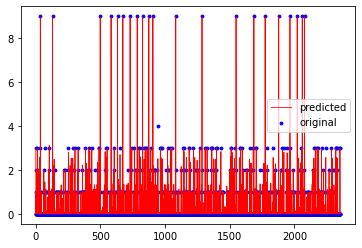

In [312]:
#the predicted plot and the original points
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=8, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [323]:
#test the model using KFold and the r2 metric
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
x,y = tf_smooth, slow_time
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#create model
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
# evaluate model
scores = cross_val_score(gbr, x, y, cv=cv, n_jobs=-1, scoring='r2')

In [326]:
scores

array([0.97558482, 0.97473547, 0.97458893, 0.98065046, 0.9800684 ,
       0.97613064, 0.98307236, 0.96823223, 0.9142445 , 0.97336559])

In [ ]:
###### PREDICT THE QUERY TIME OF THE GENERAL LOG QUERIES ######

In [212]:
general

general["argument"] = general["argument"].str.replace('ApplicationName=DataGrip 2020.2.3','')
general["argument"] = general["argument"].str.replace('-- using .[0-9]+ as a seed to the RNG','')
general["argument"] = general["argument"].str.replace('^\/\* ','')
general["argument"] = general["argument"].str.replace('^.\*/','')
general["argument"] = general["argument"].str.replace('\n\n\n','')
general["argument"] = general["argument"].str.replace('\n',' ')
general["argument"] = general["argument"].str.replace('\t','')
general["argument"] = general["argument"].str.replace(',','')
general["argument"] = general["argument"].str.casefold()


In [270]:
general

,event_time,user_host,thread_id,server_id,command_type,argument
0,2021-01-14 15:19:54.549896,guest[guest] @ [185.9.209.177],67,97408076,Query,select * from mysql.general_log where event_time > '2021-01-14 11:20:54.451611' order by event_time desc
1,2021-01-14 15:19:54.489750,guest[guest] @ [185.9.209.177],67,97408076,Query,set net_write_timeout=600
2,2021-01-14 15:19:54.430215,guest[guest] @ [185.9.209.177],67,97408076,Query,show warnings
3,2021-01-14 15:19:54.369984,guest[guest] @ [185.9.209.177],67,97408076,Query,show warnings
4,2021-01-14 15:19:54.310359,guest[guest] @ [185.9.209.177],67,97408076,Query,select database()
...,...,...,...,...,...,...
16096,2021-01-14 11:20:59.393914,rdsadmin[rdsadmin] @ localhost [127.0.0.1],9,97408076,Query,select 1
16097,2021-01-14 11:20:59.392965,rdsadmin[rdsadmin] @ localhost [127.0.0.1],9,97408076,Query,select 1
16098,2021-01-14 11:20:54.995895,guest[guest] @ [185.9.209.177],14,97408076,Query,select @@session.transaction_isolation
16099,2021-01-14 11:20:54.934014,guest[guest] @ [185.9.209.177],14,97408076,Query,show warnings


In [324]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,1))
X_g = vectorizer.fit_transform(general["argument"])

tf_idf_vec_smooth_g = TfidfVectorizer(use_idf=True,  
                        smooth_idf=True,  
                        ngram_range=(1,1))
tf_idf_data_smooth_g = tf_idf_vec_smooth_g.fit_transform(general["argument"])
 

tf_idf_dataframe_smooth_g=pd.DataFrame(tf_idf_data_smooth_g.toarray(),columns=tf_idf_vec_smooth_g.get_feature_names())
tf_idf_dataframe_smooth_g
X_drop = tf_idf_dataframe_smooth_g.drop(tf_idf_dataframe_smooth_g.columns[0:221], axis = 1)


In [251]:
#pd.set_option("display.max_columns", 668)

In [320]:
#predicting the time of the general log queries dataset
ypred = gbr.predict(X_drop)

In [322]:
#the slowest query
max(ypred)

3.73113986164483